In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json 
from abstraction import GameState

import os
import uuid


In [2]:
def GetAbstraction(fileName):
    print(fileName)
    
    board_id     = 0
    abstractions = []
        
    level = 7
    try:
        data = json.load(open(fileName))
    except:
        print('[ERROR] A game play with the eneterd data does not exist!')
        print('[INFO] Please run the program again!')
        exit()

    required_elements = ['semaphore','signal']

    gameStates = []
#     print("[INFO] You are working with a snapshopt from the game of {}".format(fileName))

    for event in data['events']:
        if event["type"]=="BOARD_SNAPSHOT":
            #Create a gameState
            gameState = GameState(level,'../DATA/maps_with_zones/MapInfo_{}.json'.format(level))
            components = event['board']['components']
            #TODO : need to handle this 2 time iterations (since sometimes the data comes such that links are added before even the board state registers the semaphore :/)
            for component in components:
                if components[component]['type'] in required_elements:
                    if components[component]['type'] == 'semaphore':
                        cell = components[component]['cell']
                        id   = components[component]['id']
                        gameState.putSemaphore(cell[0],cell[1],id)
            
            for component in components:
                if components[component]['type'] in required_elements:                
                    if components[component]['type']=='signal':
                        cell = components[component]['cell']
                        id_1   = components[component]['id']
                        id_2   = components[component]['link']
                        gameState.putSignal(cell[0],cell[1],id_1,id_2)
            
            gameStates.append(gameState)
            abstraction = gameState.getAbstraction()
            abstractions.append(abstraction)

    # print('-----------------------------------')
    # print(f'[INFO] DONE! the number of Board States Abstraced are {len(gameStates)}')
    return abstractions
    

In [ ]:
G = nx.Graph()
all_abstractions = []    
abstraction_uuid_map = {}
log_files = "../DATA/Logfiles"

#getting all unique nodes
for fileName in os.listdir(log_files):   
    abstractions = GetAbstraction('{}/{}'.format(log_files,fileName))
    nAbstraction = len(abstractions) #number of nodes on the graph
    print(fileName, nAbstraction)

    for abstraction in abstractions:
        if abstraction not in all_abstractions:
            all_abstractions.append(abstraction)

print(len(all_abstractions))
#creating all unique nodes and giving id's
for abstraction in all_abstractions:
    id = str(uuid.uuid4())
    abstraction_uuid_map[id] = abstraction
    G.add_node(
        id,
        nSemaphores = abstraction['nSemaphores'],
        nSignals = abstraction['nSignals'],
        sempahore_zone_dict=str(abstraction['semaphore_zone_dict']),
        signal_zone_dict=str(abstraction['signal_zone_dict']),
        link_dict = str(abstraction['link_dict'])                   
        )

for fileName in os.listdir(log_files):   
    abstractions = GetAbstraction('{}/{}'.format(log_files,fileName))
    for index,abstraction in enumerate(abstractions):
        key1 = None
        key2 = None
        for key in abstraction_uuid_map:
            if abstraction_uuid_map[key]==abstraction:
                key1 = key

        if index+1 < len(abstractions):
            next_node = abstractions[index+1]
            for key in abstraction_uuid_map:
                if abstraction_uuid_map[key]==next_node:
                    key2 = key 

        if key1 and key2:
            print('[INFO] Adding Edge Between {} and {}'.format(key1,key2))
            G.add_edge(key1,key2)
    print('--------')

In [ ]:
nx.draw(G)
plt.show()

In [3]:
origin_abstraction = {'nSignals': 0, 'adjaceny_matrix': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'link_dict': {}, 'nSemaphores': 0, 'signal_zone_dict': {}, 'semaphore_zone_dict': {}}
solution_abstraction ={'link_dict': {'IG': 1, 'HF': 1}, 'adjaceny_matrix': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'semaphore_zone_dict': {'F': 1, 'G': 1}, 'nSemaphores': 2, 'nSignals': 2, 'signal_zone_dict': {'I': 1, 'H': 1}}

In [15]:
graphs           = []
log_files = "../DATA/Logfiles"

#getting all unique nodes
# for fileName in os.listdir(log_files):   
    
#Create A New Graph
traces = os.listdir("../DATA/Logfiles")
traces.sort()
print("[INFO] Avilable Game Traces:     ")

for index,value in enumerate(traces):
    print(index,' : ',value)

trace_id=int(input('[USER] Please enter the  index of the trace id :  '))
fileName = traces[trace_id]

G = nx.DiGraph()
color_map = []

unique_nodes = []
abstraction_uuid_map = {}
abstractions = GetAbstraction('{}/{}'.format(log_files,fileName))
nAbstraction = len(abstractions) 


for abstraction in abstractions:

    if abstraction not in unique_nodes:
        unique_nodes.append(abstraction)
        id = str(uuid.uuid4())
    
        abstraction_uuid_map[id] = abstraction
        G.add_node(
            id,
            nSemaphores = abstraction['nSemaphores'],
            nSignals = abstraction['nSignals'],
            sempahore_zone_dict=str(abstraction['semaphore_zone_dict']),
            signal_zone_dict=str(abstraction['signal_zone_dict']),
            link_dict = str(abstraction['link_dict'])                   
            )



for nodes in G.nodes:
    print(nodes)

            
for index,abstraction in enumerate(abstractions):
    key1 = None
    key2 = None
    for key in abstraction_uuid_map:
        if abstraction_uuid_map[key]==abstraction:
            key1 = key

    if index+1 < len(abstractions):
        next_node = abstractions[index+1]
        for key in abstraction_uuid_map:
            if abstraction_uuid_map[key]==next_node:
                key2 = key 

                
    if key1 and key2:
        print('[INFO] Adding Edge Between {} and {}'.format(key1,key2))
        G.add_edge(key1,key2)

        



[INFO] Avilable Game Traces:     
0  :  03021ea9-78a2-434d-adc0-b9fd063d4291.json
1  :  6c48747a-8c8c-43c5-8c7e-ff80f281b508.json
2  :  81dc330b-4077-494b-91b3-fc8cc4fe2604.json
3  :  8bbeff9b-9e06-4993-b919-c9cd59a77f16.json
4  :  ae26b920-1410-437f-bcba-c481ec3098f0.json
5  :  c057d16f-023e-491d-baee-371e5081939a.json
6  :  f5d99f4b-d52e-412b-8111-54cbbafffcfb.json
[USER] Please enter the  index of the trace id :  6
../DATA/Logfiles/f5d99f4b-d52e-412b-8111-54cbbafffcfb.json
9c7412aa-d7f5-4208-a410-cb4576c0e1f0
db0428fa-4973-4625-8595-95c3de5ae288
a794f395-96b0-47fa-95d6-9c6348c5f2e8
[INFO] Adding Edge Between 9c7412aa-d7f5-4208-a410-cb4576c0e1f0 and 9c7412aa-d7f5-4208-a410-cb4576c0e1f0
[INFO] Adding Edge Between 9c7412aa-d7f5-4208-a410-cb4576c0e1f0 and a794f395-96b0-47fa-95d6-9c6348c5f2e8
[INFO] Adding Edge Between a794f395-96b0-47fa-95d6-9c6348c5f2e8 and db0428fa-4973-4625-8595-95c3de5ae288
[INFO] Adding Edge Between db0428fa-4973-4625-8595-95c3de5ae288 and db0428fa-4973-4625-8595-9

In [16]:
print('==============EDGES===========')
for edge in G.edges:
    print(edge)

color_map = []

print('===========NODES==============')
for node in G.nodes:
    print(node)
    if abstraction_uuid_map[node] == origin_abstraction:
        color_map.append("blue")
        print('[INFO] Recivied Origin', id)

    elif abstraction_uuid_map[node]['link_dict']=={'IG': 1, 'HF': 1}:
        color_map.append("green")
        print('[INFO] Recivied Solution',id)

    else:
        print('[INFO] Recived Wrong State',id)
        color_map.append("red")


==============EDGES===========
('9c7412aa-d7f5-4208-a410-cb4576c0e1f0', '9c7412aa-d7f5-4208-a410-cb4576c0e1f0')
('9c7412aa-d7f5-4208-a410-cb4576c0e1f0', 'a794f395-96b0-47fa-95d6-9c6348c5f2e8')
('db0428fa-4973-4625-8595-95c3de5ae288', 'db0428fa-4973-4625-8595-95c3de5ae288')
('a794f395-96b0-47fa-95d6-9c6348c5f2e8', 'db0428fa-4973-4625-8595-95c3de5ae288')
===========NODES==============
9c7412aa-d7f5-4208-a410-cb4576c0e1f0
[INFO] Recivied Origin db0428fa-4973-4625-8595-95c3de5ae288
db0428fa-4973-4625-8595-95c3de5ae288
[INFO] Recivied Solution db0428fa-4973-4625-8595-95c3de5ae288
a794f395-96b0-47fa-95d6-9c6348c5f2e8
[INFO] Recived Wrong State db0428fa-4973-4625-8595-95c3de5ae288


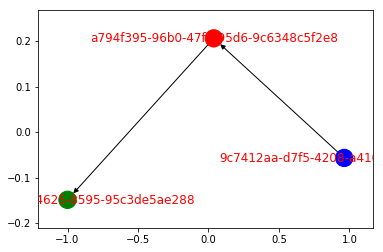

<Figure size 8640x8640 with 0 Axes>

In [17]:
labels = {}    
for node in G.nodes():
    labels[node] = node

        
pos = nx.spring_layout(G)       
nx.draw_networkx_nodes(G,pos, node_color=color_map)
nx.draw_networkx_labels(G,pos,labels,font_size=12,font_color='r')
nx.draw_networkx_edges(G, pos, edgelist= G.edges, width = 1, alpha = 1)


plt.figure(figsize=(120,120)) 
plt.show()